In [1]:
import numpy as np
import cv2
import os 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras import regularizers
import keras.layers.advanced_activations
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils
from tensorflow.keras.models import Model


print("Done Importing")

Done Importing


In [2]:
images = []
labels = []

#Reading Files
outerFiles = os.listdir('Data')
len(outerFiles)

for i in range(len(outerFiles)):
    #Class Files
    classFiles = os.listdir('Data\\'+outerFiles[i])
    for j in range(len(classFiles)):
        #Image Files
        imageFiles = os.listdir('Data\\'+outerFiles[i]+'\\'+classFiles[j])
        for k in range(len(imageFiles)):
            curImg = cv2.imread('Data\\'+outerFiles[i]+'\\'+classFiles[j]+'\\'+imageFiles[k])
            labels.append(imageFiles[k].split('.')[-2][-1])
            images.append(curImg)
    print(str(i) + '(0, 1) Done', end=" | ")

0(0, 1) Done | 1(0, 1) Done | 2(0, 1) Done | 3(0, 1) Done | 4(0, 1) Done | 5(0, 1) Done | 6(0, 1) Done | 7(0, 1) Done | 8(0, 1) Done | 9(0, 1) Done | 10(0, 1) Done | 11(0, 1) Done | 12(0, 1) Done | 13(0, 1) Done | 14(0, 1) Done | 15(0, 1) Done | 16(0, 1) Done | 17(0, 1) Done | 18(0, 1) Done | 19(0, 1) Done | 20(0, 1) Done | 21(0, 1) Done | 22(0, 1) Done | 23(0, 1) Done | 24(0, 1) Done | 25(0, 1) Done | 26(0, 1) Done | 27(0, 1) Done | 28(0, 1) Done | 29(0, 1) Done | 30(0, 1) Done | 31(0, 1) Done | 32(0, 1) Done | 33(0, 1) Done | 34(0, 1) Done | 35(0, 1) Done | 36(0, 1) Done | 37(0, 1) Done | 38(0, 1) Done | 39(0, 1) Done | 40(0, 1) Done | 41(0, 1) Done | 42(0, 1) Done | 43(0, 1) Done | 44(0, 1) Done | 45(0, 1) Done | 46(0, 1) Done | 47(0, 1) Done | 48(0, 1) Done | 49(0, 1) Done | 50(0, 1) Done | 51(0, 1) Done | 52(0, 1) Done | 53(0, 1) Done | 54(0, 1) Done | 55(0, 1) Done | 56(0, 1) Done | 57(0, 1) Done | 58(0, 1) Done | 59(0, 1) Done | 60(0, 1) Done | 61(0, 1) Done | 62(0, 1) Done | 63

In [3]:
len(images), len(labels)

(277524, 277524)

In [4]:
"""
Getting the validation data
"""
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=116)

In [5]:
"""
Storing the number of samples
"""
noOfSamples = []
noOfSamples.append(y_train.count('0'))
noOfSamples.append(y_train.count('1'))

noOfSamples

[158995, 63024]

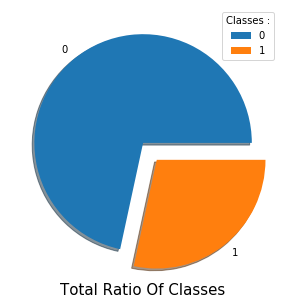

In [6]:
plt.figure(figsize=(20,5))
plt.pie(noOfSamples, labels=['0', '1'], explode = [0, 0.2], shadow=True)
plt.legend(title = "Classes :")
plt.xlabel("Total Ratio Of Classes", fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [7]:
"""
Preprocessing image function
"""
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    img = cv2.resize(img, (28, 28))
    return img

In [8]:
"""
Try Preprocessing
"""
img = preProcessing(X_train[1000])
conv_img = cv2.resize(img, (28, 28))
cv2.imshow('Not Process Image', cv2.resize(X_train[1000], (28, 28)))
cv2.waitKey(0)
cv2.imshow('Preprocessed Image', conv_img)
cv2.waitKey(0)

-1

In [9]:
# conv_img.shape

In [10]:
"""
Preprocessing image
"""
X_train = np.array(list(map(preProcessing, X_train)))
X_val = np.array(list(map(preProcessing, X_val)))
X_train.shape

(222019, 28, 28)

In [57]:
cv2.imshow('Preprocessed Image', X_train[10])
cv2.waitKey(0)

-1

In [11]:
"""
Reshaping images
"""
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1], X_val.shape[2], 1)

In [12]:
"""
Transforming images
"""
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10,
                            horizontal_flip=True)

dataGen.fit(X_train)

In [80]:
# """
# One Hot Encoding
# """
# # FOR TRAINING DATA
# onehot_train = pd.get_dummies(y_train)
# onehot_train_labels = onehot_train.columns
# y_train_labels = onehot_train.as_matrix()


# # FOR VALIDATION DATA
# onehot_val = pd.get_dummies(y_val)
# onehot_val_labels = onehot_val.columns
# y_val_labels = onehot_val.as_matrix()

In [88]:
# y_train = y_train_labels
# y_val = y_val_labels

In [91]:
y_train[:10]

['1', '1', '0', '0', '0', '0', '0', '0', '0', '0']

## Model

In [13]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), input_shape=(28, 28, 1)),
keras.layers.PReLU(alpha_initializer="zeros"),

# tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3)),
keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3)),
keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3)),
keras.layers.PReLU(alpha_initializer="zeros"),
# tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3)),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(256),
                      
tf.keras.layers.Dense(1, activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=['accuracy'])

In [14]:
# model = model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 26, 26, 16)        10816     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 24, 24, 32)        18432     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 22, 22, 64)        30976     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        3

In [15]:
y_train_float = np.asarray(y_train).astype(np.float32)
y_val_float = np.asarray(y_val).astype(np.float32)

In [19]:
# batchSizeVal = 20
# epochVal = 18
# stepsPerEpoch = 100

# history = model.fit(dataGen.flow(X_train, y_train_float,
#                                 batch_size=batchSizeVal),
#                                 steps_per_epoch=stepsPerEpoch,
#                                 epochs=epochVal,
#                                 validation_data=(X_val, y_val_float),
#                                 shuffle=1)

In [20]:
batchSizeVal = 20
epochVal = 18
stepsPerEpoch = 100

history = model.fit(X_train, y_train_float,
                                batch_size=batchSizeVal,
                                steps_per_epoch=stepsPerEpoch,
                                epochs=epochVal,
                                shuffle=1)

Epoch 1/18
100/100 [==============================] - 31s 304ms/step - loss: 0.0000e+00 - accuracy: 0.2860
Epoch 2/18
100/100 [==============================] - 30s 304ms/step - loss: 0.0000e+00 - accuracy: 0.2910
Epoch 3/18
100/100 [==============================] - 29s 290ms/step - loss: 0.0000e+00 - accuracy: 0.2815
Epoch 4/18
100/100 [==============================] - 29s 294ms/step - loss: 0.0000e+00 - accuracy: 0.2880
Epoch 5/18
100/100 [==============================] - 29s 288ms/step - loss: 0.0000e+00 - accuracy: 0.2800
Epoch 6/18
100/100 [==============================] - 29s 288ms/step - loss: 0.0000e+00 - accuracy: 0.2710
Epoch 7/18
100/100 [==============================] - 29s 287ms/step - loss: 0.0000e+00 - accuracy: 0.2770
Epoch 8/18
100/100 [==============================] - 29s 287ms/step - loss: 0.0000e+00 - accuracy: 0.2800
Epoch 9/18
100/100 [==============================] - 29s 294ms/step - loss: 0.0000e+00 - accuracy: 0.2835
Epoch 10/18
100/100 [================

In [115]:
y_train_float.shape

(222019,)